In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np


In [2]:
data_x = np.loadtxt('/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/2/hw1x.dat')
data_y = np.loadtxt('/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/2/hw1y.dat')
data = []
x = []
y = []

for val in range(len(data_x)):
    data.append([data_x[val],data_y[val]])
    x.append(data_x[val])
    y.append(data_y[val])

    

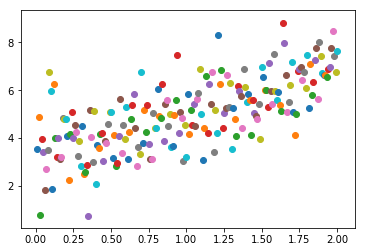

In [3]:
for i in range(len(data)):    
    plt.scatter(data[i][0],data[i][1])
    

the gradient is: [1.78157138]
the intercept is: [3.2447227]


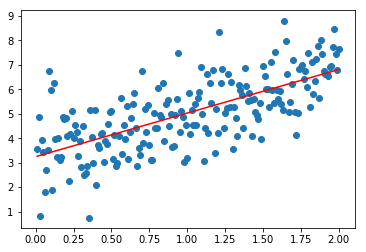

In [102]:
input_x = []
for x in data_x:
    input_x.append([x,1])
    
input_x = np.reshape(input_x,(-1,2))
#print(inputs)
input_y = np.reshape(data_y,(-1,1))
#print(input_y)

def closed_form(input_x,input_y):
    A = (1/len(input_x)) * np.dot(np.transpose(input_x),input_x)
    b = (1/len(input_x)) * np.dot(np.transpose(input_x),input_y)
    return (np.dot(np.linalg.inv(A),b))

m , b = closed_form(input_x,input_y)
print("the gradient is: " + str(m))
print("the intercept is: " + str(b))
plt.scatter(data_x,data_y)
plt.plot(input_x,m*input_x + b, color = "red")

In [103]:
theta = closed_form(input_x,input_y)
def empirical_risk(theta,input_x,y):
    risk = 0
    for i in range(len(input_x)):   
        risk += ((y[i] - np.dot(np.transpose(theta),input_x[i]))**2) / 2
    risk = risk * 1/(len(input_x))
    return np.asscalar(risk)
print("The empirical risk is: " + str(empirical_risk(theta,input_x,input_y)))


The empirical risk is: 0.5812605752543935


In [104]:
#print(input_x.reshape(-1,2))
#print(np.add(theta.reshape(1,2),(np.dot(np.transpose(theta),input_x[0])* input_x[0]).reshape(1,2)))
#print(theta.reshape(1,2).shape)
#print( ((y[0] - (np.dot(np.transpose(theta),input_x[0])* input_x[0]))*0.01).reshape(1,2))
#print((np.dot(np.transpose(theta),input_x[0])* input_x[0]).reshape(2,1))
#(theta)


# def gradient_descent(learning_rate,num_epoch,input_x,y,theta):
#     for epoch in range(num_epoch): 
#         for i in range(len(input_x)):
#            # empiricalrisk = empirical_risk(theta,input_x,input_y)
#             theta = np.add(theta.reshape(2,1),((learning_rate*(y[i] - np.dot(np.transpose(theta),input_x[i])))*input_x[i]).reshape(2,1))
#     return theta.reshape(1,2).flatten()

import sys


# def gradient_descent(learning_rate,num_epoch,input_x,y):
#     weight = np.array([0,0])
#     min_weight = 0
#     min_risk = sys.maxsize
    
#     for i in range(num_epoch):
#         randx = x[i]
#         randy = y[i]
#         weight += (learning_rate) * np.dot(np.array(randy - np.dot(weight, randx)), randx)
#         risk = empirical_risk(weight, x, y)
#         if risk < minrisk:
#             min_risk = risk
#             min_weight = weight
    
#     return bestweight


def gradientdesc(x, y, learning_rate = 0.01, iterations = 100):
    weight = np.zeros(2)
    bestweight = 0
    minrisk = sys.maxsize

    for i in range(iterations):
        randx = x[i]
        randy = y[i]
        weight += (learning_rate) * np.dot(np.array(randy - np.dot(weight, randx)), randx)
        risk = trainingerror(x, y, weight)
        if risk < minrisk:
            minrisk = risk
            bestweight = weight
    
    return bestweight

temp = gradientdesc(input_x,input_y)
print(temp)

ValueError: shapes (1,) and (2,) not aligned: 1 (dim 0) != 2 (dim 0)

In [105]:
import random
def stochastic_descent(learning_rate,num_epoch,input_x,y):
    theta = np.array([0,0])
    for n in range(num_epoch):
        iters = len(input_x)
        while(iters>0):
            i = random.randrange(0,len(input_x))
           # if(y[i]*np.dot(np.transpose(theta),input_x[i]))<=1:
            theta = np.add(theta,(learning_rate*y[i]*input_x[i]))
            iters -= 1       
    return theta

teta = stochastic_descent(0.01,50,input_x,input_y)
print(teta)
print(np.insert(input_x[0],0,input_x[0][0]**2))
#input_x[0] = np.insert(input_x[0],0,input_x[0][0]**2)
print(input_x[0])

[572.31792933 506.45712936]
[1.e-04 1.e-02 1.e+00]
[0.01 1.  ]


In [106]:
def polyfeatures(x, d):
    ones = np.ones(len(x))
    x_new = np.copy(x)
    
    for power in range(2, d + 1):
        new_feature = np.power(x, power)
        x_new = np.column_stack((x_new, new_feature))
    
    return np.column_stack((x_new, ones))
    
def PolyRegress(x, y, d):
    
    weight = closed_form(polyfeatures(x, d), y)
    
    return weight

quadweight = PolyRegress(input_x, input_y, 2)

LinAlgError: Singular matrix